## ANALISIS EXPLORATORIO DE LOS DATOS
---

#### Importa las librerias

In [24]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
print('Se han importado todas las librerias')

Se han importado todas las librerias


### Cargar los Datasets y convertirlos en DataFrame

In [40]:
df =  pd.read_parquet('train.parquet')
df_test = pd.read_parquet('test.parquet')
print('Se han cargado todos los datasets')

Se han cargado todos los datasets


### Realizar un Analisis exploratorio de los Datos (EDA)

**Descripción de las dimensiones**
* **id**: Identificador del anuncio.
* **url**: Link web del anuncio.
* **region**: Región de Estados Unidos en donde se encuentra la propiedad.
* **region_url**: Link web de los anuncios pertenecientes a la región.
* **price**: Precio de la propiedad en petrodólares.
* **type**: Tipo de propiedad.
* **sqfeet**: Metros cuadrados de la propiedad.
* **beds**: Cantidad de dormitorios.
* **baths**: Cantidad de baños.
* **cats_allowed**: Si se permiten gatos en la propiedad toma el valor 1, 0 para caso contrario.
* **dogs_allowed**: Si se permiten perros en la propiedad toma el valor 1, 0 para caso contrario.
* **smoking_allowed**: Si se permite fumar en la propiedad toma el valor 1, 0 para caso contrario.
* **wheelchair_access**: Si la propiedad posee acceso para sillas de ruedas toma el valor 1, 0 para caso contrario.
* **electric_vehicle_charge**: Si la propiedad posee cargador para vehículos eléctricos toma el valor 1, 0 para caso contrario.
* **comes_furnished**: Si la propiedad viene amueblada toma el valor 1, 0 para caso contrario.
* **laundry_options**: Opciones de lavandería (w/d in unit: Lavadora/secadora en la propiedad, w/d hookups: conexión para lavadora/secadora, laundry on site: servicio de lavandería en el lugar, laundry in bldg: servicio de lavandería en el edificio, no laundry on sit: sin servicio de lavandería).
* **parking_options**: Opciones de estacionamiento (off-street parking: zona de estacionamiento, attached garage: garaje incluido, carport: cochera/garaje abierto, detached garage: garaje separado, street parking: estacionamiento delimitado en la calle, no parking: sin estacionamiento, valet parking: estacionamiento con servicio valet).
* **image_url**: Link web de la imagen de la propiedad en el anuncio.
* **description**: Descripción de la propiedad puesta en el anuncio.
* **lat**: Latitud.
* **long**: Longitud.
* **state**: Código del estado al que pertenece la propiedad.​

In [4]:
#Evaluar la informacion de los dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [43]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

In [44]:
df_test.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
image_url                      0
description                    0
lat                          196
long                         196
state                          0
dtype: int64

## **Normalizacion de las columnas**

En este paso se limpia, normaliza y se transforma  los datos que contienen valores categoricos para que los algoritmos de aprendizaje hagan las predicciones posibles.

In [49]:
# Hacer una copia del dataframe de test para evitar alterarlo
df_copy = df.copy()
print('Su copia ha sido generado exitosamente')

# Se cambia los nulos, 
# si es de type str = sin_dato y; 
df_copy['laundry_options'].fillna('sin_dato', inplace=True)
df_copy['parking_options'].fillna('sin_dato', inplace=True)
df_copy['description'].fillna('sin_dato', inplace=True)

#si es float = 0.00
df_copy['lat'].fillna(0.00, inplace=True)
df_copy['long'].fillna(0.00, inplace=True)
print('Se han reemplazado todos los nulos')

Su copia ha sido generado exitosamente
Se han reemplazado todos los nulos


In [50]:
# Hacer una copia del dataframe de test para evitar alterarlo
df_test_copy = df_test.copy()
print('Su copia ha sido generado exitosamente')

# Se cambia los nulos, 
# si es de type str = sin_dato y; 
df_test_copy['laundry_options'].fillna('sin_dato', inplace=True)
df_test_copy['parking_options'].fillna('sin_dato', inplace=True)
df_test_copy['description'].fillna('sin_dato', inplace=True)

#si es float = 0.00
df_test_copy['lat'].fillna(0.00, inplace=True)
df_test_copy['long'].fillna(0.00, inplace=True)
print('Se han reemplazado todos los nulos')

Su copia ha sido generado exitosamente
Se han reemplazado todos los nulos


#### Eliminar columnas que no son importante para el analisis ya que no tienen importancia logica

In [51]:
df_test_copy.head(2)

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt


In [52]:
'''Se procedio a revisar 3 registros aleatorios de las url y generaba error 404,
por ello, se eliminan las columnas que a primera vista no son importante
para el modelo,'''

print('EL dataframe tiene',len(df_copy.columns), 'columnas')
df_copy.drop(['url','region_url','image_url','description'], axis=1, inplace=True)
df_test_copy.drop(['url','region_url','image_url','description'], axis=1, inplace=True)
print('EL dataframe tiene',len(df_copy.columns), 'columnas')

EL dataframe tiene 22 columnas
EL dataframe tiene 18 columnas


#### Agregar varible objetivo y variables categoricas


In [8]:
# Agregar la variable objetivo
# (Se asigna 1 para propiedades entre 0$ - 999$ y 0 para las propiedades mayores a 999$)

category_price = [(df_copy['price'] <= 999), (df_copy['price'] > 999)]
values = [1,0]
df_copy.insert(18, 'category_price', np.select(category_price,values))
print('se ha agregado la variable objetivo "category_price" ')

#Revisamos la cantidad de valores agregados a la variable objetivo
print('Cantidades de  0 y 1 en la variable objetivo \n', df_copy['category_price'].value_counts())

se ha agregado la variable objetivo "category_price" 
Cantidades de  0 y 1 en la variable objetivo 
 0    185825
1    160654
Name: category_price, dtype: int64


In [9]:
#lista de columnas numericas y categoricas, excluyendo la variable objetivo
columns = df_copy.drop(columns=['category_price','price']).columns
columns_number = df_copy.drop(columns=['category_price','price'])._get_numeric_data().columns.tolist()
columns_cate = list(set(columns)-set(columns_number))
print('Columnas Numericas:\n',columns_number)
print('Columnas Categóricas:\n',columns_cate)

Columnas Numericas:
 ['id', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'lat', 'long']
Columnas Categóricas:
 ['state', 'laundry_options', 'parking_options', 'type', 'region']


In [10]:
#Label Encoder
#region
label_enc = LabelEncoder()
df_copy['region'] =label_enc.fit_transform(df_copy['region'])
print('Etiqueta de region:\n',list(label_enc.classes_))

#parking_options
label_enc = LabelEncoder()
df_copy['parking_options'] =label_enc.fit_transform(df_copy['parking_options'])
print('Etiqueta de parking_options:\n',list(label_enc.classes_))

#state
label_enc = LabelEncoder()
df_copy['state'] =label_enc.fit_transform(df_copy['state'])
print('etiquetas de state:\n',list(label_enc.classes_))

#laundry_options
label_enc = LabelEncoder()
df_copy['laundry_options'] =label_enc.fit_transform(df_copy['laundry_options'])
print('Etiqueta de laundry_options:\n',list(label_enc.classes_))

#type
label_enc = LabelEncoder()
df_copy['type'] =label_enc.fit_transform(df_copy['type'])
print('etiquetas de type:\n',list(label_enc.classes_))

Etiqueta de region:
 ['SF bay area', 'abilene', 'akron / canton', 'albany', 'albuquerque', 'altoona-johnstown', 'amarillo', 'ames', 'anchorage / mat-su', 'ann arbor', 'annapolis', 'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens', 'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield', 'baltimore', 'baton rouge', 'battle creek', 'beaumont / port arthur', 'bellingham', 'bemidji', 'bend', 'billings', 'binghamton', 'birmingham', 'bismarck', 'bloomington', 'bloomington-normal', 'boise', 'boone', 'boston', 'boulder', 'bowling green', 'bozeman', 'brainerd', 'brownsville', 'brunswick', 'buffalo', 'butte', 'cape cod / islands', 'catskills', 'cedar rapids', 'central NJ', 'central louisiana', 'central michigan', 'champaign urbana', 'charleston', 'charlotte', 'charlottesville', 'chattanooga', 'chautauqua', 'chicago', 'chico', 'chillicothe', 'cincinnati', 'clarksville', 'cleveland', 'clovis / portales', 'college station', 'colorado springs', 'columbia', 'columbia / jeff city', 'columbus'

In [53]:
#Label Encoder
#region
label_enc = LabelEncoder()
df_test_copy['region'] =label_enc.fit_transform(df_test_copy['region'])
print('Etiqueta de region:\n',list(label_enc.classes_))

#parking_options
label_enc = LabelEncoder()
df_test_copy['parking_options'] =label_enc.fit_transform(df_test_copy['parking_options'])
print('Etiqueta de parking_options:\n',list(label_enc.classes_))

#state
label_enc = LabelEncoder()
df_test_copy['state'] =label_enc.fit_transform(df_test_copy['state'])
print('etiquetas de state:\n',list(label_enc.classes_))

#laundry_options
label_enc = LabelEncoder()
df_test_copy['laundry_options'] =label_enc.fit_transform(df_test_copy['laundry_options'])
print('Etiqueta de laundry_options:\n',list(label_enc.classes_))

#type
label_enc = LabelEncoder()
df_test_copy['type'] =label_enc.fit_transform(df_test_copy['type'])
print('etiquetas de type:\n',list(label_enc.classes_))

Etiqueta de region:
 ['SF bay area', 'abilene', 'akron / canton', 'albany', 'albuquerque', 'altoona-johnstown', 'amarillo', 'ames', 'anchorage / mat-su', 'ann arbor', 'annapolis', 'appleton-oshkosh-FDL', 'asheville', 'ashtabula', 'athens', 'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield', 'baltimore', 'baton rouge', 'battle creek', 'beaumont / port arthur', 'bellingham', 'bemidji', 'bend', 'billings', 'binghamton', 'birmingham', 'bismarck', 'bloomington', 'bloomington-normal', 'boise', 'boone', 'boston', 'boulder', 'bowling green', 'bozeman', 'brainerd', 'brownsville', 'brunswick', 'buffalo', 'butte', 'cape cod / islands', 'catskills', 'cedar rapids', 'central NJ', 'central louisiana', 'central michigan', 'champaign urbana', 'charleston', 'charlotte', 'charlottesville', 'chattanooga', 'chautauqua', 'chicago', 'chico', 'chillicothe', 'cincinnati', 'clarksville', 'cleveland', 'clovis / portales', 'college station', 'colorado springs', 'columbia', 'columbia / jeff city', 'columbus'

### Hacer la Correlacion para elegir las varibles
Se toman las columnas con valores de 0.1 

In [11]:
corr = df_copy.corr()
corr

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state,category_price
id,1.000000,-0.016933,-0.001062,-0.042886,-0.005211,-0.020890,-0.036490,0.043673,0.035597,0.016282,0.007329,0.019418,-0.030653,0.015102,-0.033384,-0.004710,-0.074063,0.000971,-0.101539
region,-0.016933,1.000000,-0.001755,0.013705,-0.001037,-0.001312,0.006008,0.025761,0.019259,-0.011079,-0.015653,0.010340,-0.024486,0.008522,-0.068985,-0.028440,-0.057954,-0.018243,-0.037104
price,-0.001062,-0.001755,1.000000,-0.000707,0.000008,0.000071,0.000156,0.001026,0.001044,0.001024,-0.000423,-0.000186,-0.000374,0.000703,0.000308,-0.001291,0.000709,-0.001558,-0.001759
type,-0.042886,0.013705,-0.000707,1.000000,0.007094,0.105790,0.236359,-0.106959,-0.071137,-0.065002,-0.048134,0.001356,0.040171,0.146879,-0.184413,0.035981,0.016527,0.012792,-0.041841
sqfeet,-0.005211,-0.001037,0.000008,0.007094,1.000000,0.004030,0.010611,-0.003808,-0.002791,-0.002164,-0.001234,-0.000150,0.001235,-0.000111,-0.005222,0.006237,-0.002696,-0.002543,-0.005171
beds,-0.020890,-0.001312,0.000071,0.105790,0.004030,1.000000,0.378980,-0.024088,-0.013665,-0.001809,-0.012290,-0.005221,0.002834,0.052342,-0.032468,0.005601,0.009694,0.001077,-0.047671
baths,-0.036490,0.006008,0.000156,0.236359,0.010611,0.378980,1.000000,-0.019610,0.018844,-0.014784,0.019484,0.008324,0.039178,0.282678,-0.139381,-0.079261,0.000807,-0.022307,-0.227544
cats_allowed,0.043673,0.025761,0.001026,-0.106959,-0.003808,-0.024088,-0.019610,1.000000,0.887352,0.016858,0.122285,0.049270,-0.059488,0.065870,-0.069148,-0.009478,0.027014,0.026612,0.009900
dogs_allowed,0.035597,0.019259,0.001044,-0.071137,-0.002791,-0.013665,0.018844,0.887352,1.000000,0.013732,0.129010,0.049180,-0.038191,0.117924,-0.083516,-0.048507,0.015376,0.021539,0.003936
smoking_allowed,0.016282,-0.011079,0.001024,-0.065002,-0.002164,-0.001809,-0.014784,0.016858,0.013732,1.000000,-0.223676,-0.096233,-0.161876,-0.095085,0.207034,-0.157188,0.149743,-0.011103,0.124547


In [12]:
corr = df_copy[['baths','smoking_allowed','laundry_options','parking_options','state','category_price']]

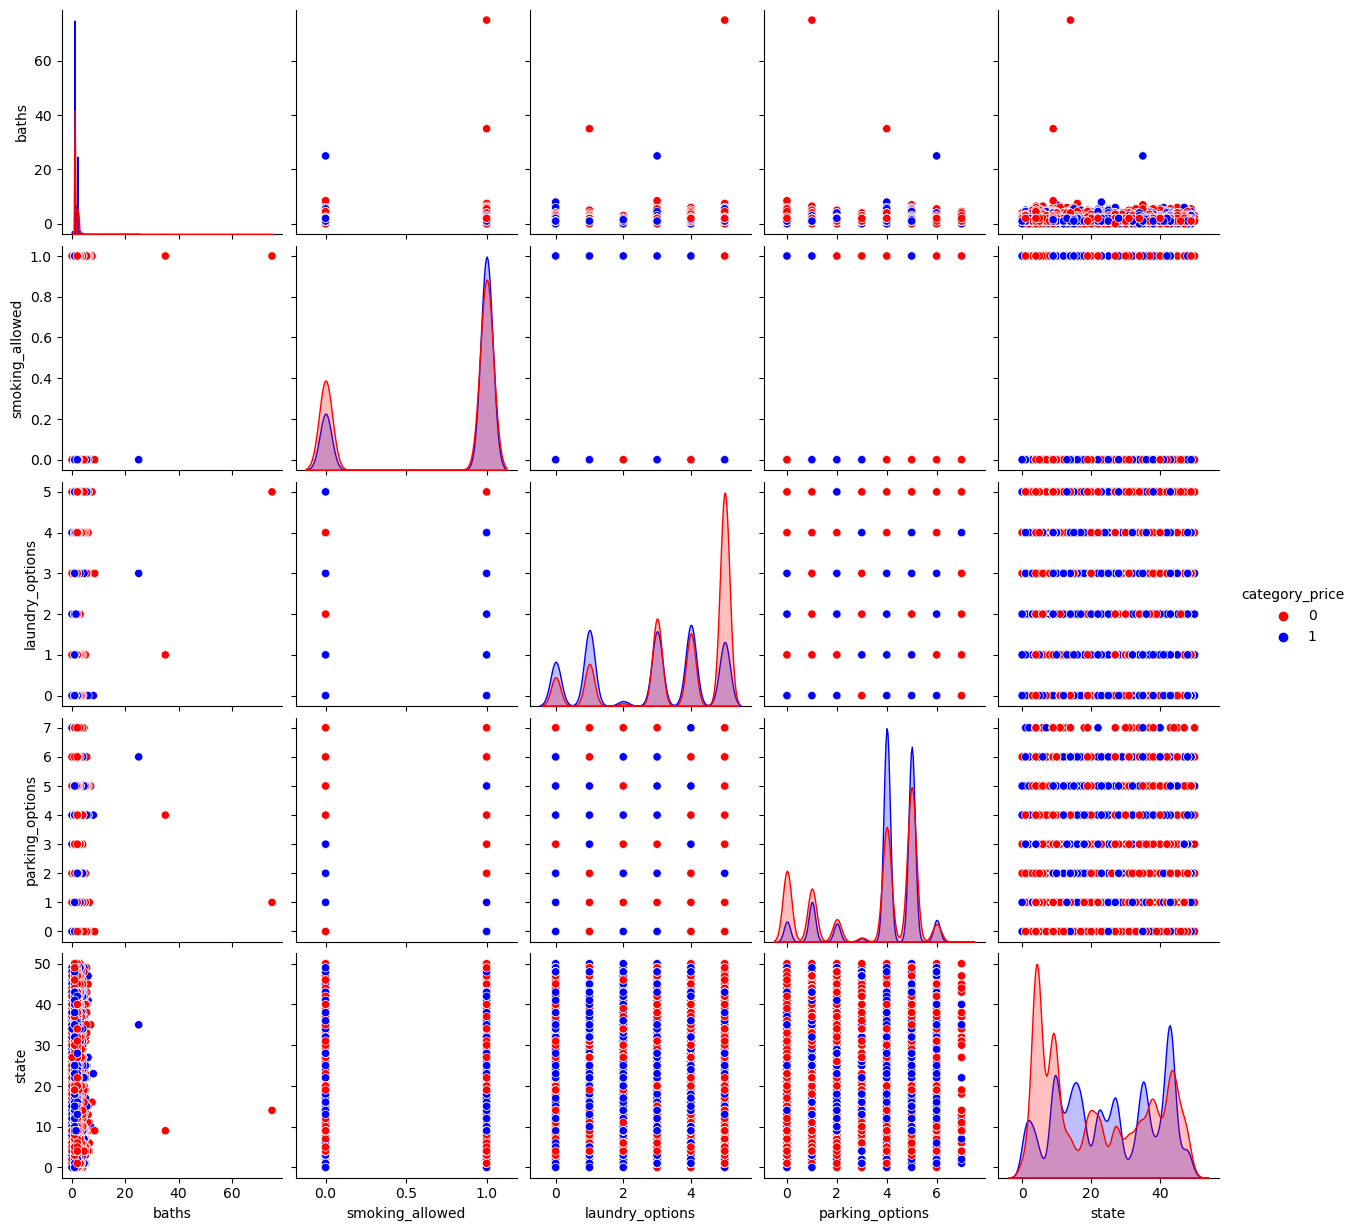

In [13]:
sns.pairplot(corr, hue="category_price", palette = ['r', 'b'])
plt.show() #15min

In [55]:
corr_test = df_test_copy[['baths','smoking_allowed','laundry_options','parking_options','state']]

## Modelo de Regresion Logistica
---

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
import pandas as pd

#Dataset
corr

# Separar los datos en características y etiquetas
X_train = corr.drop('category_price', axis=1)
y_train = corr['category_price']
X_test = corr_test

In [15]:
# Dividir los datos en conjunto de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
# Crear el modelo de regresión logística
clf = LogisticRegression()

In [61]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

LogisticRegression()

In [62]:
# Hacer predicciones con los datos de prueba
y_pred = clf.predict(X_test)

In [64]:
y_test = pd.read_csv('aylinv94.csv')

In [19]:
# Calcular la precisión del modelo
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# Calcular el recall del modelo
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Accuracy:  0.6544244978065112
Recall:  0.5967993511355129


#### Llevando al columna de prediccion a csv

In [63]:
prediccion = pd.DataFrame(y_pred, columns = ['pred'])

prediccion.to_csv('aylinv94.csv', index = False)

## Modelo de  Arboles de Desicion
---

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Cargar los datos
X = corr.drop('category_price', axis=1)
y = corr['category_price']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [72]:
# Instanciamos el modelo clasificador
    
clf = DecisionTreeClassifier (max_depth = 3, criterion='entropy')

In [74]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [76]:
# Calcular la precisión del modelo
print('Precisión en el set de entrenamiento: {0: .2f}'.format(clf.score(X_train, y_train)))
print('Precisión en el set de testeo: {0: .2f}'.format(clf.score(X_test, y_test)))

Precisión en el set de entrenamiento:  0.71
Precisión en el set de testeo:  0.71


#### Prueba con los datos de corr_test

In [77]:
# Separar los datos en características y etiquetas
X_train = corr.drop('category_price', axis=1)
y_train = corr['category_price']
X_test = corr_test

In [78]:
# Instanciamos el modelo clasificador
clf = DecisionTreeClassifier (max_depth = 3, criterion='entropy')

In [79]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
# Hacer predicciones con los datos de prueba
y_pred = clf.predict(X_test)

#### Llevando al columna de prediccion a csv

In [81]:
prediccion = pd.DataFrame(y_pred, columns = ['pred'])

prediccion.to_csv('aylinv94.csv', index = False)